<a href="https://colab.research.google.com/github/udghosh/Temp_hackathon/blob/main/Aurora_RoundHacks_Temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting The Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Essential Libraries And Functions
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# importing Warnings To remove Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the CSV file
df = pd.read_csv('/content/drive/MyDrive/Aurora_RoundHacks/new_train.csv')
df.head()

,date,temp
0,01-01-1980,4.16
1,02-01-1980,4.06
2,03-01-1980,7.12
3,04-01-1980,9.23
4,05-01-1980,3.20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11323 entries, 0 to 11322
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    11323 non-null  object 
 1   temp    11323 non-null  float64
dtypes: float64(1), object(1)
memory usage: 177.0+ KB


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11323 entries, 0 to 11322
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    11323 non-null  datetime64[ns]
 1   temp    11323 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 177.0 KB


In [ ]:
# To disable Scrolling

from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 100000})'''))
df.head(50)

<IPython.core.display.Javascript object>

,date,temp
0,1980-01-01,4.16
1,1980-02-01,4.06
2,1980-03-01,7.12
3,1980-04-01,9.23
4,1980-05-01,3.20
5,1980-06-01,7.01
6,1980-07-01,3.21
7,1980-08-01,2.03
8,1980-09-01,4.49
9,1980-10-01,5.94


In [ ]:
df.isnull().sum()

date    0
temp    0
dtype: int64

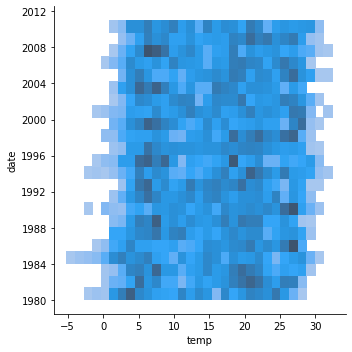

In [ ]:
sns.displot(data=df, x="temp", y="date")

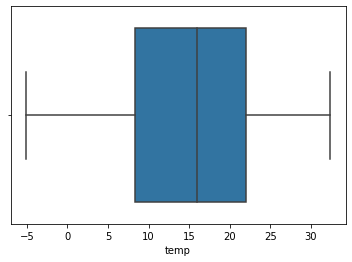

In [ ]:
# Plotting Box plot to Check for Outliers

sns.boxplot(df.temp)

In [ ]:
# Creating Features in train from due Date

df['date_month'] = df.date.dt.month
df['date_quarter'] = df.date.dt.quarter
df['date_year'] = df.date.dt.year
df['date_day'] = df.date.dt.day

In [ ]:
df.head(20)

,date,temp,date_month,date_quarter,date_year,date_day
0,1980-01-01,4.16,1,1,1980,1
1,1980-02-01,4.06,2,1,1980,1
2,1980-03-01,7.12,3,1,1980,1
3,1980-04-01,9.23,4,2,1980,1
4,1980-05-01,3.20,5,2,1980,1
5,1980-06-01,7.01,6,2,1980,1
6,1980-07-01,3.21,7,3,1980,1
7,1980-08-01,2.03,8,3,1980,1
8,1980-09-01,4.49,9,3,1980,1
9,1980-10-01,5.94,10,4,1980,1


In [ ]:
df.tail(20)

,date,temp,date_month,date_quarter,date_year,date_day
11303,2010-12-12,10.45,12,4,2010,12
11304,2010-12-13,8.28,12,4,2010,13
11305,2010-12-14,11.82,12,4,2010,14
11306,2010-12-15,7.55,12,4,2010,15
11307,2010-12-16,4.51,12,4,2010,16
11308,2010-12-17,6.54,12,4,2010,17
11309,2010-12-18,6.95,12,4,2010,18
11310,2010-12-19,6.95,12,4,2010,19
11311,2010-12-20,9.76,12,4,2010,20
11312,2010-12-21,11.42,12,4,2010,21


In [ ]:
df["date_year"].nunique()

31

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11323 entries, 0 to 11322
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          11323 non-null  datetime64[ns]
 1   temp          11323 non-null  float64       
 2   date_month    11323 non-null  int64         
 3   date_quarter  11323 non-null  int64         
 4   date_year     11323 non-null  int64         
 5   date_day      11323 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 530.9 KB


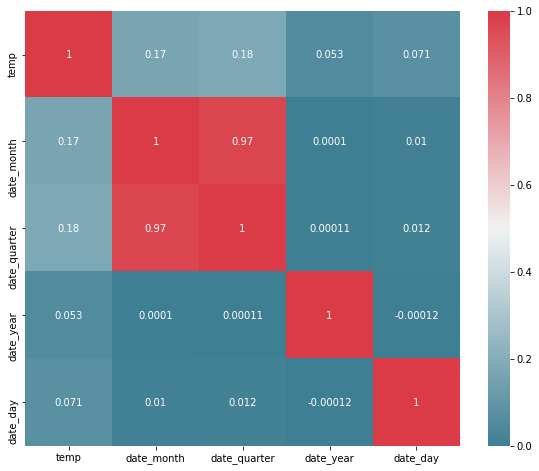

In [ ]:
# Plotting Heatmap To check Corelation

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True)
plt.show()

In [ ]:
# Dropping date time columns

df.drop(["date"], axis  = 1, inplace = True)

In [ ]:
# Checking Corelation of numeric columns
df.corr().loc['temp',:]

temp            1.000000
date_month      0.166175
date_quarter    0.175887
date_year       0.053064
date_day        0.070769
Name: temp, dtype: float64

In [ ]:
# Funtion to clean the dateset for Nan Values and infinite numbers and mismatch in datatype values

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
# Calling the Cleaning Function
clean_dataset(df)

,temp,date_month,date_quarter,date_year,date_day
0,4.16,1.0,1.0,1980.0,1.0
1,4.06,2.0,1.0,1980.0,1.0
2,7.12,3.0,1.0,1980.0,1.0
3,9.23,4.0,2.0,1980.0,1.0
4,3.20,5.0,2.0,1980.0,1.0
...,...,...,...,...,...
11318,5.42,12.0,4.0,2010.0,27.0
11319,7.54,12.0,4.0,2010.0,28.0
11320,6.45,12.0,4.0,2010.0,29.0
11321,4.19,12.0,4.0,2010.0,30.0


In [ ]:
Y_train = pd.DataFrame(data = df.iloc[:,0].values)
df = df.drop(['temp'],axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, Y_train, test_size=0.05, random_state=42)


In [ ]:
X_test.head(20)

,date_month,date_quarter,date_year,date_day
1250,4,2,1983,6
2816,9,3,1987,17
6013,6,2,1996,18
7609,10,4,2000,31
9174,12,4,2005,2
1807,12,4,1984,12
1121,1,1,1983,26
6321,4,2,1997,22
1383,10,4,1983,15
5773,10,4,1995,22


In [ ]:
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)

In [ ]:
# Function for feature Selection Based on Corelation
def cor(dataset,thres):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > thres:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr            

In [ ]:
# Setting Threshold value for feature Selection

corr_features = cor(df, 0.8)
len(corr_features)

1

In [ ]:
corr_features

{'date_quarter'}

In [ ]:
# Dropping Columns that shows poor Features

df.drop(labels=corr_features, axis = 1, inplace= True)

In [ ]:
X_train.shape

(10756, 4)

In [ ]:
X_test.shape

(567, 4)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predict = lr.predict(X_train)
MSE = mean_squared_error(y_train, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(y_train, predict)
SCORE = lr.score(X_train, y_train)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

59.75590839927722 
 7.730194590000773 
 0.03916811076570137 
 0.03916811076570137 



In [ ]:
predict = lr.predict(X_test)
MSE = mean_squared_error(y_test, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(y_test, predict)
SCORE = lr.score(X_test, y_test)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

57.35972894395531 
 7.573620596779014 
 0.03182779007742742 
 0.03182779007742742 



In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
predict = dtr.predict(X_train)
MSE = mean_squared_error(y_train, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(y_train, predict)
SCORE = dtr.score(X_train, y_train)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

0.0 
 0.0 
 1.0 
 1.0 



In [ ]:
predict = dtr.predict(X_test)
MSE = mean_squared_error(y_test, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(y_test, predict)
SCORE = dtr.score(X_test, y_test)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

5.314422574955909 
 2.305303141661831 
 0.9102981073379063 
 0.9102981073379063 



In [ ]:
rf = RandomForestRegressor(n_estimators= 20, random_state= 10)
rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [ ]:
predict = rf.predict(X_train)
MSE = mean_squared_error(y_train, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(y_train, predict)
SCORE = rf.score(X_train, y_train)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

0.5580877578328375 
 0.7470527142262703 
 0.9910263515511456 
 0.9910263515511457 



In [ ]:
predict = rf.predict(X_test)
MSE = mean_squared_error(y_test, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(y_test, predict)
SCORE = rf.score(X_test, y_test)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

3.5002053395061736 
 1.8708835718735075 
 0.9409201960831511 
 0.9409201960831511 



In [ ]:
"""from sklearn.model_selection import GridSearchCV
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [5, 10, 15, 20, 40],
              "max_depth": [1, 2, 3, 4, 5, 6, 7, 8],
              "min_samples_leaf": [5, 10, 20, 30, 40, 50],
              "max_leaf_nodes": [5, 10, 20, 30, 40, 50],
              }"""

'from sklearn.model_selection import GridSearchCV\nparam_grid = {"criterion": ["mse", "mae"],\n              "min_samples_split": [5, 10, 15, 20, 40],\n              "max_depth": [1, 2, 3, 4, 5, 6, 7, 8],\n              "min_samples_leaf": [5, 10, 20, 30, 40, 50],\n              "max_leaf_nodes": [5, 10, 20, 30, 40, 50],\n              }'

In [ ]:
#dtr = DecisionTreeRegressor()

In [ ]:
#grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 5)

In [ ]:
#grid_search.fit(X_train, y_train)

In [ ]:
#grid_search.best_params_

In [ ]:
dtr = DecisionTreeRegressor(max_depth = 10, max_leaf_nodes = 200, min_samples_leaf = 10, min_samples_split = 20)
dtr.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=200,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
predict = dtr.predict(X_train)
MSE = mean_squared_error(y_train, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(y_train, predict)
SCORE = dtr.score(X_train, y_train)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

4.771630971120936 
 2.184406320060656 
 0.9232756170305918 
 0.9232756170305918 



In [ ]:
predict = dtr.predict(X_test)
MSE = mean_squared_error(y_test, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(y_test, predict)
SCORE = dtr.score(X_test, y_test)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

4.82035897947602 
 2.1955315938232407 
 0.9186373838980418 
 0.9186373838980418 



In [ ]:
"""
param_grid = {
    'bootstrap': [True],
    'max_depth': [30, 40, 50, 60, 70],
    'max_features': [4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [1, 2, 3, 4, 5, 6],
    'n_estimators': [30, 40, 50, 60]
}
"""

"\nparam_grid = {\n    'bootstrap': [True],\n    'max_depth': [30, 40, 50, 60, 70],\n    'max_features': [4, 5, 6, 7, 8],\n    'min_samples_leaf': [1, 2, 3, 4, 5],\n    'min_samples_split': [1, 2, 3, 4, 5, 6],\n    'n_estimators': [30, 40, 50, 60]\n}\n"

In [ ]:
#rf = RandomForestRegressor()

In [ ]:
#grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
#grid_search.fit(X_train, y_train)

In [ ]:
#grid_search.best_params_

In [ ]:
rf = RandomForestRegressor(bootstrap= True, max_depth =  80, max_features = 4, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 60, random_state=10)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [ ]:
predict = rf.predict(X_train)
MSE = mean_squared_error(y_train, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(y_train, predict)
SCORE = rf.score(X_train, y_train)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

0.4991323379431635 
 0.7064929850629541 
 0.9919743121627507 
 0.9919743121627507 



In [ ]:
predict = rf.predict(X_test)
MSE = mean_squared_error(y_test, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(y_test, predict)
SCORE = rf.score(X_test, y_test)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

3.4095786819517926 
 1.8465044494806375 
 0.9424498792413134 
 0.9424498792413134 



In [ ]:
'''sr = SVR()
sr.fit(X_train, y_train)
'''

'sr = SVR()\nsr.fit(X_train, y_train)\n'

In [ ]:
'''predict = sr.predict(X_train)
MSE = mean_squared_error(y_train, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(y_train, predict)
SCORE = sr.score(X_train, y_train)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')'''

"predict = sr.predict(X_train)\nMSE = mean_squared_error(y_train, predict)\nRMSE = np.sqrt(MSE)\nR2_SCORE = r2_score(y_train, predict)\nSCORE = sr.score(X_train, y_train)\nprint(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')"

In [ ]:
'''predict = sr.predict(X_test)
MSE = mean_squared_error(y_test, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(y_test, predict)
SCORE = sr.score(X_test, y_test) 
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')'''

"predict = sr.predict(X_test)\nMSE = mean_squared_error(y_test, predict)\nRMSE = np.sqrt(MSE)\nR2_SCORE = r2_score(y_test, predict)\nSCORE = sr.score(X_test, y_test) \nprint(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')"

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Aurora_RoundHacks/new_test.csv')
test = pd.DataFrame(test)
test.head()

,date
0,01-01-2011
1,02-01-2011
2,03-01-2011
3,04-01-2011
4,05-01-2011


In [ ]:
test['date'] = pd.to_datetime(test['date'])

In [ ]:
# Creating Features in train from due Date

test['date_month'] = test.date.dt.month
test['date_quarter'] = test.date.dt.quarter
test['date_year'] = test.date.dt.year
test['date_day'] = test.date.dt.day


In [ ]:
# Dropping date time columns

test.drop(["date"], axis  = 1, inplace = True)


In [ ]:
# Artificial Neural Network
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=30, activation='relu'))
ann.add(tf.keras.layers.Dense(units=25, activation='relu'))
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))

ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
#earlystop = EarlyStopping(monitor= "loss")
ann.fit(X_train, y_train, batch_size = 16, epochs = 2000)
#, callbacks = earlystop)


In [ ]:
predict = ann.predict(X_train)
MSE = mean_squared_error(y_train, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(y_train, predict)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n')

5.7240035526436595 
 2.3924889869430244 
 0.9079621531192894 



In [ ]:
predict = ann.predict(X_test)
MSE = mean_squared_error(y_test, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(y_test, predict)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n')

5.213696420801787 
 2.283352014211078 
 0.9119982594317155 



In [ ]:
test.head()

,date_month,date_quarter,date_year,date_day
0,1,1,2011,1
1,2,1,2011,1
2,3,1,2011,1
3,4,2,2011,1
4,5,2,2011,1


In [ ]:
y_pred = ann.predict(test)
#pred1 = pd.DataFrame()


In [ ]:
#pred1["prediction"] = pd.Series(y_pred)
#pred1.head()

In [ ]:
pd.DataFrame(y_pred).to_csv('ANN_0.05.csv', index=False)